### 생선 분류
- 데이터셋 : fish.csv
- 피쳐/특징 : Weight, Lenght
- 타겟/라벨 : Species
- 학습방법 : 지도학습 => 분류
- 학습알고리즘 : 최근접이웃알고리즘 

[1] 데이터 준비

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
DATA_FILE = r'C:\VSCode\KDT\머신러닝\DAY01\fish.csv'

In [4]:
# 행 : Bream, Smelt,  컬럼 : Species, Weight, Height => 0,1,2
fishDF=pd.read_csv(DATA_FILE,usecols=[0,1,2])
fishDF.head(3)

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5


In [5]:
mask = (fishDF['Species'] == 'Bream') | (fishDF['Species'] == 'Smelt')
twoDF = fishDF[mask]
twoDF.reset_index(drop=True,inplace=True)
twoDF.index

RangeIndex(start=0, stop=49, step=1)

In [6]:
# Species 컬럼을 수치화 => Bream 0, Smelt 1
twoDF['FCode']=twoDF['Species'].replace({'Bream':0,'Smelt':1})

C:\Users\KDP-14\AppData\Local\Temp\ipykernel_16424\875205188.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  twoDF['FCode']=twoDF['Species'].replace({'Bream':0,'Smelt':1})
C:\Users\KDP-14\AppData\Local\Temp\ipykernel_16424\875205188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoDF['FCode']=twoDF['Species'].replace({'Bream':0,'Smelt':1})


In [7]:
twoDF.head(3)

,Species,Weight,Length,FCode
0,Bream,242.0,25.4,0
1,Bream,290.0,26.3,0
2,Bream,340.0,26.5,0


[2] 피쳐와 타겟 분리

In [8]:
features = twoDF[['Weight','Length']]
target = twoDF['FCode']

print(f'features = > {features.shape},{features.ndim}D')
print(f'target = > {target.shape},{target.ndim}D')

features = > (49, 2),2D
target = > (49,),1D


[2] 학습용, 테스트용 데이터셋 준비

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# train : test = 80:20 ===> test_size=0.2 또는 train_size=0.8
# stratify 매개변수 : 분류일 경우 사용, 분류 타겟의 종류에 대한 비율을 고려 
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2,
                                                    stratify=target,
                                                    random_state=10)

In [11]:
print(f'X_train : {X_train.shape},{X_train.ndim}D')
print(f'y_train : {y_train.shape},{y_train.ndim}D')

print(f'X_test : {X_test.shape},{X_test.ndim}D')
print(f'y_test : {y_test.shape},{y_test.ndim}D')

X_train : (39, 2),2D
y_train : (39,),1D
X_test : (10, 2),2D
y_test : (10,),1D


In [12]:
# target 0(Bream), 1(Smelt)의 비율
y_train.value_counts()[0]/y_train.shape[0] , y_train.value_counts()[1]/y_train.shape[0]

(0.717948717948718, 0.28205128205128205)

In [13]:
y_test.value_counts()[0]/y_test.shape[0] , y_test.value_counts()[1]/y_test.shape[0]

(0.7, 0.3)

[3-2] 피쳐 스케일링

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
# 스케일러 인스턴스 생성
mmScaler = MinMaxScaler()

In [16]:
# 데이터에 기반한 MinMaxScaler 동작을 위한 학습 진행
mmScaler.fit(X_train)

MinMaxScaler()

In [17]:
mmScaler.min_,mmScaler.data_min_,mmScaler.scale_,mmScaler.data_max_

(array([-0.00674519, -0.31410256]),
 array([6.7, 9.8]),
 array([0.00100675, 0.03205128]),
 array([1000.,   41.]))

In [18]:
# 학습용 데이터 ==> 스케일링 ==> ndarray 타입 반환
X_train_scaled=mmScaler.transform(X_train)
X_train_scaled.shape

(39, 2)

In [19]:
# 테스트용 데이터셋 ==> 스케일링 ==> ndarray 타입 반환
X_test_scaled = mmScaler.transform(X_test)
X_test_scaled.shape, X_test_scaled.min(), X_test_scaled.max()

((10, 2), 0.0033222591362126247, 0.8489882210812445)

[4] 훈련/학습 진행
- 학습 알고리즘 인스턴스 생성
- 학습 진행 => fit()

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
# 인스턴스 생성
model = KNeighborsClassifier()

In [22]:
# 학습 진행 => 학습용 데이터셋
model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [23]:
# 학습 후 모델 파라미터 확인
model.classes_,  model.n_samples_fit_
# model.feature_names_in_,  <== ndarray일 경우 컬럼명 X

(array([0, 1], dtype=int64), 39)

[5] 모델 성능평가 ==> socre() 메서드 + 테스트 데이터셋

In [24]:
model.score(X_test_scaled,y_test)

1.0

[6] 최적의 K개수 찾기 ==> 모델의 성능 영향 미치는 파라미터
- 하이퍼 파라미터

In [39]:
# K의 범위 : 1 ~ 전체 데이터 개수

scores, points = [], []
for k in range(1,40):
    # 최근접 이웃 데이터 수 설정
    model.n_neighbors = k

    # 모델 예측 값 추정
    model.fit(X_train_scaled, y_train)
    # 이 부분은 생략해도 상관없음. 데이터 셋이 많으면 시간만 걸리는 부분

    # 점수 계산 및 저장
    jumsu = model.score(X_test_scaled,y_test)
    # print(f'[{k}] jumsu => {jumsu}')

    if k>1:
        if jumsu != scores[-1]: points.append(k)
    scores.append(jumsu)


In [42]:
points

[22]

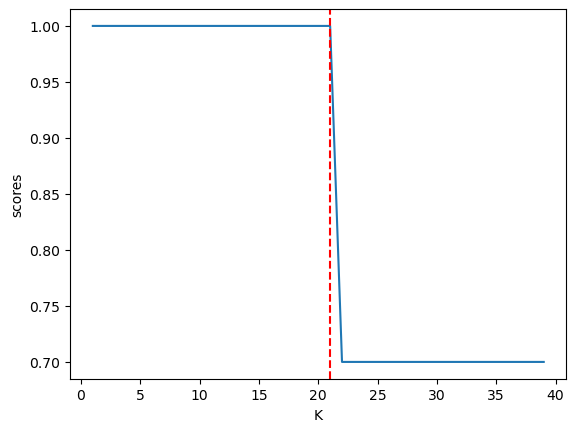

In [52]:
# X축 k, y축 점수
plt.plot(range(1,40),scores)
plt.xlabel('K')
plt.ylabel('scores')
plt.axvline(points[0]-1,0.0,1.0,color='r',linestyle='dashed')
#              |
#          값이 떨어지는 부분 찾음.
plt.show()

[7] 예측 하기 ==> 학습/훈련과 테스트에 사용되지 않은 데이터 사용
- 주의 : 입력 데이터 ==> 2D

In [27]:
new_data = pd.DataFrame([[413,27.8]],columns=['Weight','Length']) #,columns=model.feature_names_in_
new_data


,Weight,Length
0,413,27.8


In [28]:
new_data_scaled = mmScaler.transform(new_data)
new_data_scaled

array([[0.40904057, 0.57692308]])

In [29]:
# 임의의 새로운 데이터의 예측
model.predict(new_data_scaled)

array([0], dtype=int64)

In [30]:
### 최근접한 k개 데이터 찾기
distance, index = model.kneighbors(new_data_scaled)

In [31]:
distance

array([[0.04209753, 0.06334927, 0.07138647, 0.07421737, 0.07974703,
        0.08448221, 0.10667685, 0.12006426, 0.13283514, 0.13487345,
        0.14742788, 0.15337025, 0.23143819, 0.25707598, 0.26964939,
        0.29923871, 0.3005092 , 0.33355916, 0.33834045, 0.35427164,
        0.36978152, 0.38571904, 0.57002596, 0.61493269, 0.62276118,
        0.63676715, 0.63743027, 0.64447977, 0.64901627, 0.65396783,
        0.66044108, 0.66734496, 0.66921546, 0.67438368, 0.68627917,
        0.68648846, 0.68855791, 0.70647952, 0.70721597]])

In [32]:
neighbors = index.reshape(-1).tolist()
neighbors

[25,
 22,
 21,
 0,
 6,
 17,
 29,
 10,
 2,
 36,
 12,
 37,
 33,
 30,
 23,
 31,
 11,
 9,
 14,
 24,
 26,
 16,
 5,
 35,
 3,
 20,
 18,
 4,
 1,
 27,
 7,
 28,
 15,
 19,
 13,
 38,
 32,
 34,
 8]

In [33]:
new_data_scaled[0,0], new_data_scaled[0,1]

(0.4090405718312696, 0.5769230769230771)

In [34]:
k_weight = X_train_scaled[neighbors][:,0]
k_length = X_train_scaled[neighbors][:,1]

print(new_data_scaled)
print(k_weight, k_length,sep='\n')

[[0.40904057 0.57692308]]
[4.26155240e-01 3.58703312e-01 4.46290144e-01 3.85885432e-01
 4.46290144e-01 3.35548173e-01 4.96627404e-01 4.71458774e-01
 2.85210913e-01 4.96627404e-01 4.96627404e-01 3.35548173e-01
 5.97301923e-01 5.72133293e-01 6.07369375e-01 6.17436827e-01
 6.47639183e-01 6.97976442e-01 6.82875264e-01 6.77841538e-01
 6.97976442e-01 7.18111346e-01 1.32890365e-02 9.19460385e-01
 5.53709856e-03 6.74519279e-03 9.24494111e-01 9.54696466e-01
 3.12091010e-03 3.22158462e-03 1.00000000e+00 2.01349039e-03
 3.12091010e-03 3.02023558e-03 3.02023558e-04 9.49662740e-01
 8.05396154e-04 9.74831370e-01 0.00000000e+00]
[0.61538462 0.61538462 0.63782051 0.6474359  0.6474359  0.53525641
 0.63782051 0.67948718 0.52884615 0.67948718 0.69551282 0.71153846
 0.71153846 0.77564103 0.75961538 0.79166667 0.75961538 0.74358974
 0.77564103 0.80769231 0.80769231 0.80769231 0.16666667 0.91987179
 0.1025641  0.08333333 0.95192308 0.91987179 0.07051282 0.06410256
 0.87179487 0.04807692 0.04487179 0.0384615

In [35]:
X_train_scaled[:,0], X_train_scaled[:,1]

(array([3.85885432e-01, 3.12091010e-03, 2.85210913e-01, 5.53709856e-03,
        9.54696466e-01, 1.32890365e-02, 4.46290144e-01, 1.00000000e+00,
        0.00000000e+00, 6.97976442e-01, 4.71458774e-01, 6.47639183e-01,
        4.96627404e-01, 3.02023558e-04, 6.82875264e-01, 3.12091010e-03,
        7.18111346e-01, 3.35548173e-01, 9.24494111e-01, 3.02023558e-03,
        6.74519279e-03, 4.46290144e-01, 3.58703312e-01, 6.07369375e-01,
        6.77841538e-01, 4.26155240e-01, 6.97976442e-01, 3.22158462e-03,
        2.01349039e-03, 4.96627404e-01, 5.72133293e-01, 6.17436827e-01,
        8.05396154e-04, 5.97301923e-01, 9.74831370e-01, 9.19460385e-01,
        4.96627404e-01, 3.35548173e-01, 9.49662740e-01]),
 array([0.6474359 , 0.07051282, 0.52884615, 0.1025641 , 0.91987179,
        0.16666667, 0.6474359 , 0.87179487, 0.        , 0.74358974,
        0.67948718, 0.75961538, 0.69551282, 0.02564103, 0.77564103,
        0.04487179, 0.80769231, 0.53525641, 0.95192308, 0.03846154,
        0.08333333, 0.

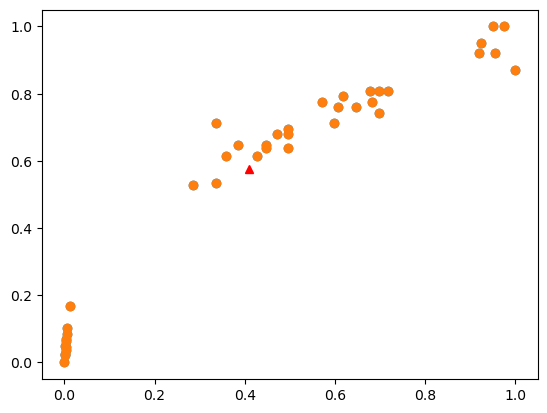

In [36]:
### 시각화로 확인
# 도미(Bream), 빙어(Smelt)에 대한 시각화 ==> 2개 피쳐 Weight, Length로 Bream,Smelt 분류 가능
# plt.scatter(twoDF.loc[:34,'Weight'],twoDF.loc[:34,'Length'])
# plt.scatter(twoDF.loc[35:,'Weight'],twoDF.loc[35:,'Length'])
plt.scatter(X_train_scaled[:,0],X_train_scaled[:,1])
plt.plot(new_data_scaled[0,0], new_data_scaled[0,1],'r^')
plt.scatter(k_weight,k_length)
plt.show()